In [ ]:
!pip install seaborn

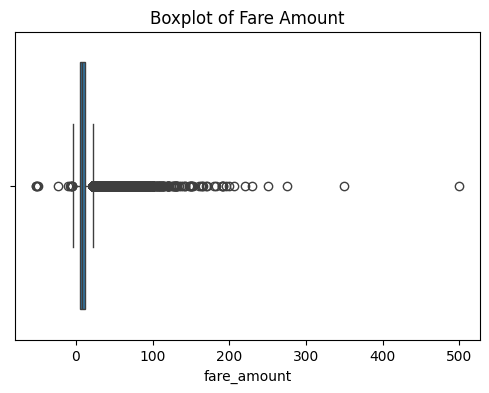

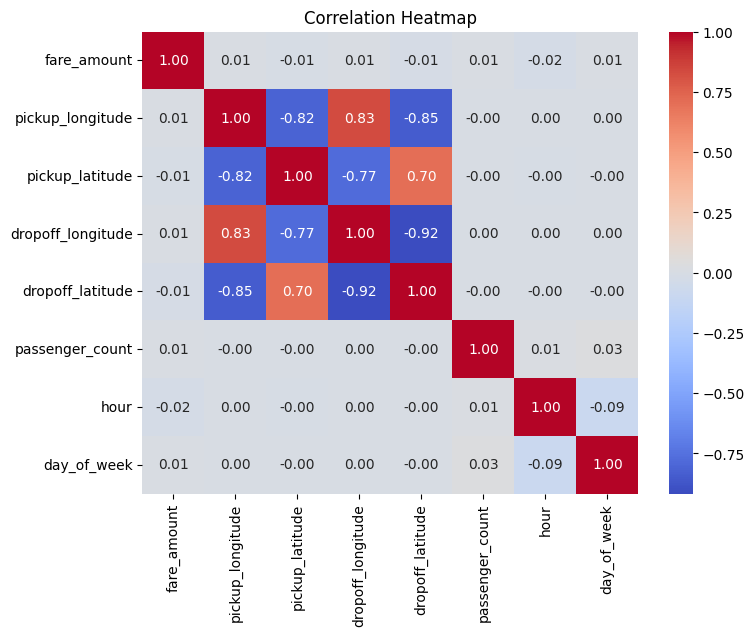

Linear Regression -> R2: 0.0007, RMSE: 10.3074
Ridge Regression -> R2: 0.0007, RMSE: 10.3074
Lasso Regression -> R2: -0.0000, RMSE: 10.3113


In [7]:
# ==== Imports ====
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer

# ==== Load & Preprocess Data ====
df = pd.read_csv("uber.csv")

# Convert datetime & extract features
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df["hour"] = df["pickup_datetime"].dt.hour
df["day_of_week"] = df["pickup_datetime"].dt.dayofweek

# Drop unused columns
df = df.drop(columns=["Unnamed: 0", "key", "pickup_datetime"])

# Handle missing values
imputer = SimpleImputer(strategy="mean")
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# ==== Features & Target ====
X = df.drop("fare_amount", axis=1)
y = df["fare_amount"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# ==== Exploratory Analysis ====
# Boxplot to see outliers
plt.figure(figsize=(6,4))
sns.boxplot(x=df["fare_amount"])
plt.title("Boxplot of Fare Amount")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# ==== Train & Evaluate Models ====
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=1.0)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f"{name} -> R2: {r2:.4f}, RMSE: {rmse:.4f}")
